# Multiple Linear Regression

In this notebook, we'll use scikit-learn to implement Multiple linear regression in the dataset used in the notebook Simpe_Linear_Regression2 that is related to fuel consumption and Carbon dioxide emission of cars. 

### Imports

In [65]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline

size=15
params = {'legend.fontsize': 'large',
          'figure.figsize': (20,8),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'axes.titlepad': 25}
plt.rcParams.update(params)

### Reading the data

In [31]:
df = pd.read_csv('data/Fuel_Consumption_2000_2020.csv')
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION CITY (L/100 km),FUEL CONSUMPTION HWY (L/100 km),FUEL CONSUMPTION COMB (L/100 km),CO2 EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,198



### Describing the dataset.

We have a fuel consumption dataset which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **YEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL** e.g. X
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HIGH WAY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMBINED (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

*** FUEL *** 
- X = Regular Gasoline
- Z = Premium Gasoline
- D = Diesel
- N = Natural Gas
- E = Ethanol

### Data Exploration

In [33]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,20560.0,2010.596352,5.754157,2000.0,2006.0,2011.0,2016.0,2020.0
ENGINE SIZE,20560.0,3.371080,1.330160,0.8,2.3,3.2,4.2,8.4
CYLINDERS,20560.0,5.867169,1.801878,2.0,4.0,6.0,8.0,16.0
FUEL CONSUMPTION CITY (L/100 km),20560.0,12.781260,3.497696,3.5,10.4,12.3,14.8,30.6
FUEL CONSUMPTION HWY (L/100 km),20560.0,8.874022,2.270207,3.2,7.3,8.4,10.2,20.6
FUEL CONSUMPTION COMB (L/100 km),20560.0,11.023954,2.910520,3.6,9.1,10.5,12.7,26.1
CO2 EMISSIONS,20560.0,249.061089,58.618284,83.0,209.0,242.0,286.0,570.0


In [35]:
df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'FUEL CONSUMPTION CITY (L/100 km)',
       'FUEL CONSUMPTION HWY (L/100 km)', 'FUEL CONSUMPTION COMB (L/100 km)',
       'CO2 EMISSIONS '],
      dtype='object')

Let's simplify the column names

In [44]:
new_columns = ['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'CONSUMPTION CITY','CONSUMPTION HWY', 'CONSUMPTION COMB','CO2 EMISSIONS']

In [45]:
df.columns=new_columns

In [46]:
df.columns

Index(['YEAR', 'MAKE', 'MODEL', 'VEHICLE CLASS', 'ENGINE SIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUEL', 'CONSUMPTION CITY', 'CONSUMPTION HWY',
       'CONSUMPTION COMB', 'CO2 EMISSIONS'],
      dtype='object')

### Selecting interesting features for multilinear fit

In [47]:
cdf = df[['ENGINE SIZE','CYLINDERS','CONSUMPTION CITY','CONSUMPTION HWY','CONSUMPTION COMB','CO2 EMISSIONS']]
cdf.head(10)

,ENGINE SIZE,CYLINDERS,CONSUMPTION CITY,CONSUMPTION HWY,CONSUMPTION COMB,CO2 EMISSIONS
0,1.6,4,9.2,6.7,8.1,186
1,1.6,4,8.5,6.5,7.6,175
2,3.2,6,12.2,7.4,10.0,230
3,3.5,6,13.4,9.2,11.5,264
4,1.8,4,10.0,7.0,8.6,198
5,1.8,4,9.3,6.8,8.2,189
6,1.8,4,9.4,7.0,8.3,191
7,3.0,6,13.6,9.2,11.6,267
8,3.2,6,13.8,9.1,11.7,269
9,1.8,4,11.4,7.2,9.5,218


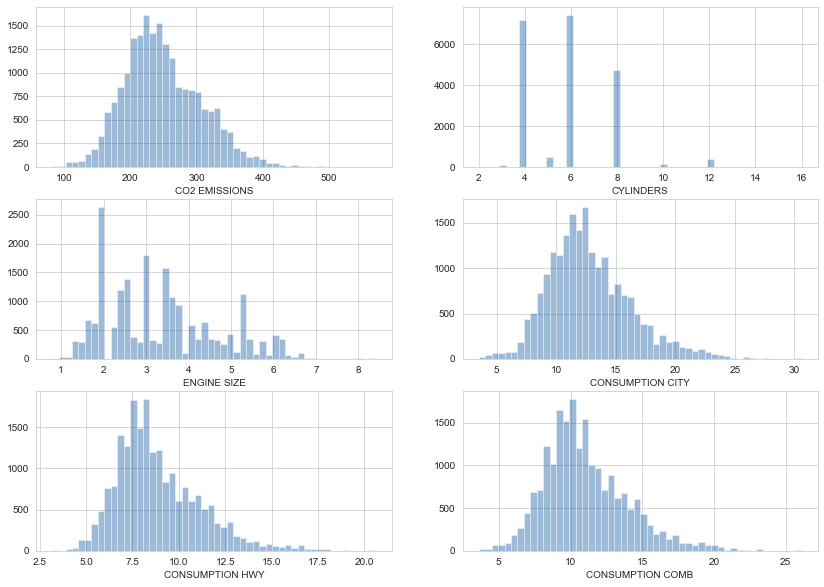

In [48]:
# Setting some seaborn parameters
sns.set_palette("Blues_r")
sns.set_style('whitegrid')

f, axes = plt.subplots(3, 2, figsize=(14, 10))
sns.distplot(cdf['CO2 EMISSIONS'], kde=False, ax=axes[0, 0])
sns.distplot(cdf['CYLINDERS'], kde=False, ax=axes[0, 1])
sns.distplot(cdf['ENGINE SIZE'], kde=False, ax=axes[1, 0])
sns.distplot(cdf['CONSUMPTION CITY'], kde=False, ax=axes[1, 1])
sns.distplot(cdf['CONSUMPTION HWY'], kde=False, ax=axes[2, 0])
sns.distplot(cdf['CONSUMPTION COMB'], kde=False, ax=axes[2, 1]);

#### Let's analyze the data a little more.

The numbers of cylinders is related to the engine size, given that a bigger engine will fit more cylinders.

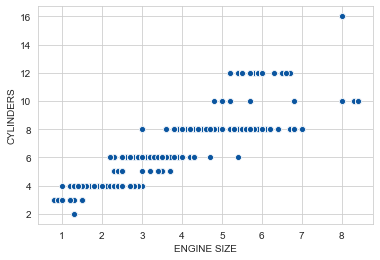

In [49]:
sns.scatterplot(x='ENGINE SIZE',y='CYLINDERS',data=df);

It's possible to see that there is a large spread for 8 cylinders, with engine sizes ranging approximately from 4 to 7.

Let's see how the Fuel consumption and emissions are related to the number of cylinders.

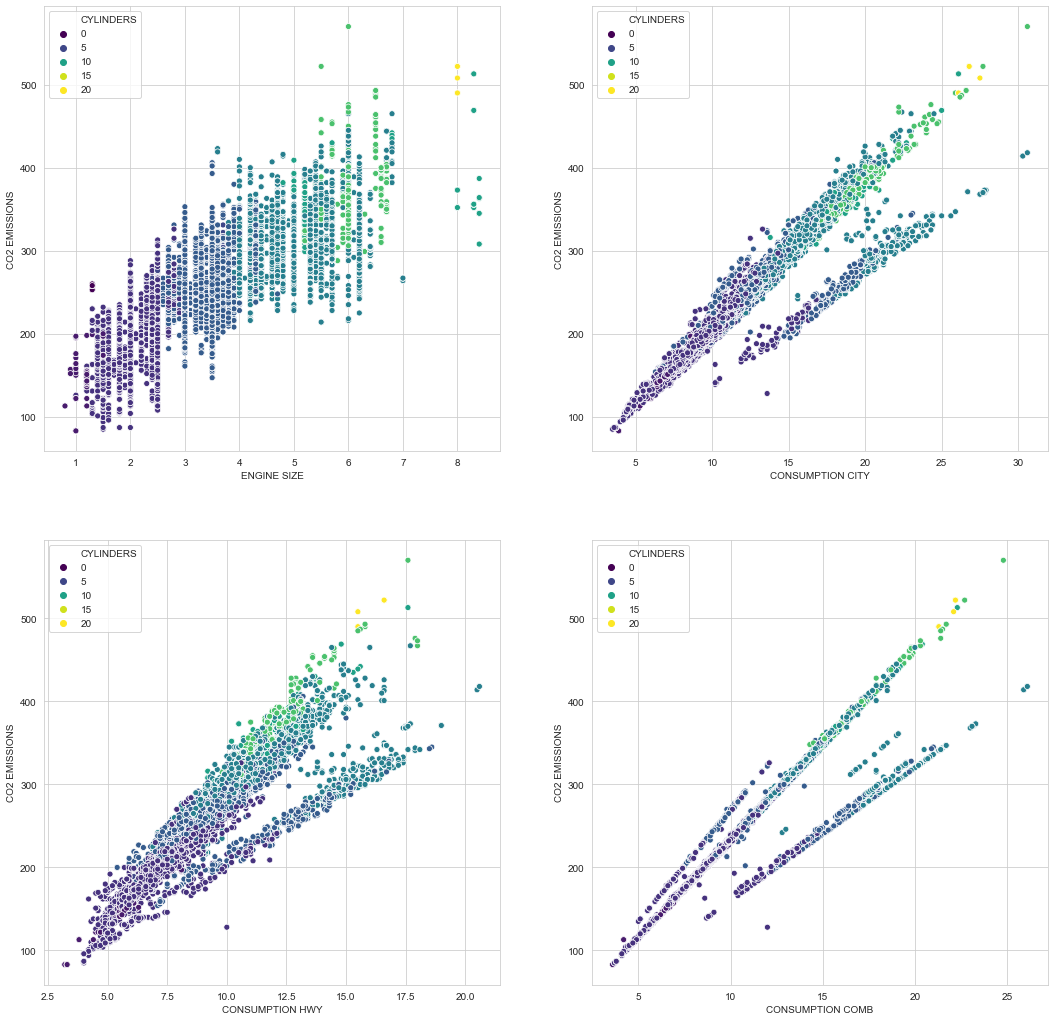

In [51]:
fig, axes = plt.subplots(2, 2, figsize=(18, 18))
sns.scatterplot(x='ENGINE SIZE',y='CO2 EMISSIONS',data=df,hue='CYLINDERS',palette='viridis',ax=axes[0,0])
sns.scatterplot(x='CONSUMPTION CITY',y='CO2 EMISSIONS',data=df,hue='CYLINDERS',palette='viridis',ax=axes[0,1])
sns.scatterplot(x='CONSUMPTION HWY',y='CO2 EMISSIONS',data=df,hue='CYLINDERS',palette='viridis',ax=axes[1,0])
sns.scatterplot(x='CONSUMPTION COMB',y='CO2 EMISSIONS',data=df,hue='CYLINDERS',palette='viridis',ax=axes[1,1]);

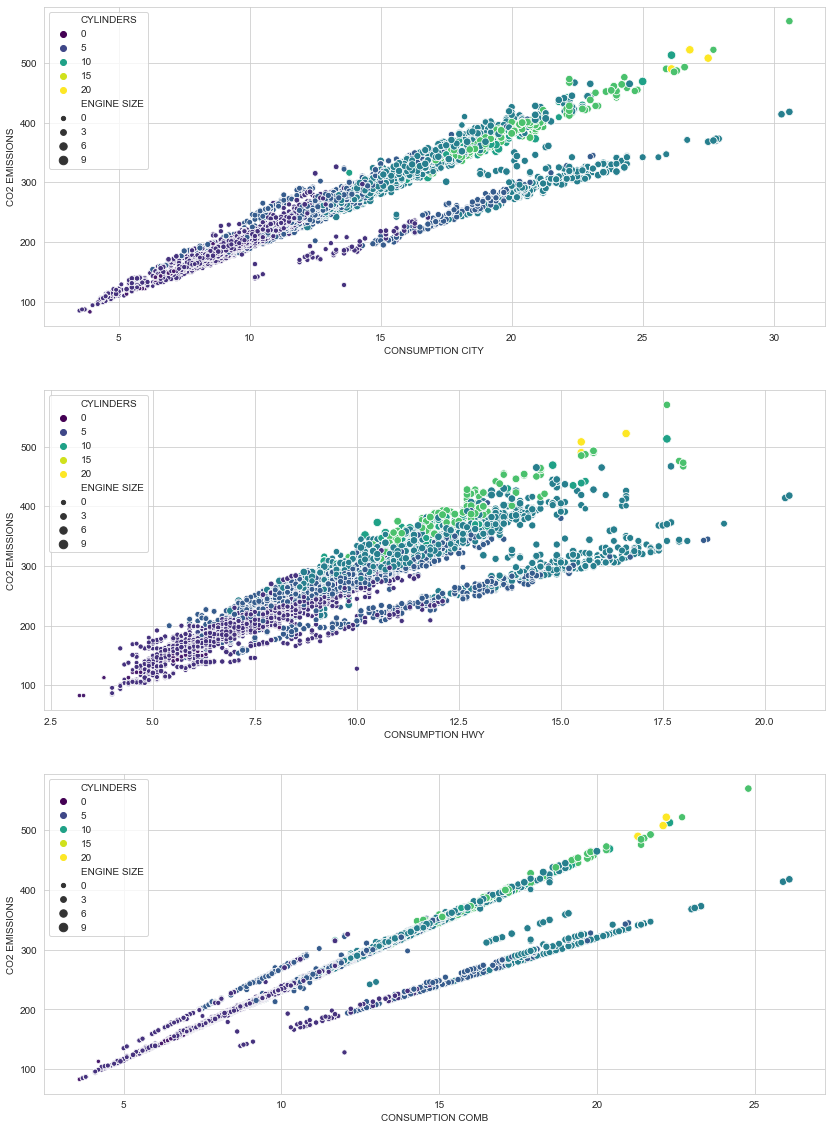

In [52]:
fig, axes = plt.subplots(3, 1, figsize=(14, 20))
sns.scatterplot(x='CONSUMPTION CITY',y='CO2 EMISSIONS',data=df,hue='CYLINDERS',palette='viridis',ax=axes[0],size='ENGINE SIZE')
sns.scatterplot(x='CONSUMPTION HWY',y='CO2 EMISSIONS',data=df,hue='CYLINDERS',palette='viridis',ax=axes[1],size='ENGINE SIZE')
sns.scatterplot(x='CONSUMPTION COMB',y='CO2 EMISSIONS',data=df,hue='CYLINDERS',palette='viridis',ax=axes[2],size='ENGINE SIZE');

Let's see how the Fuel consumption and emissions are related to the engine size.

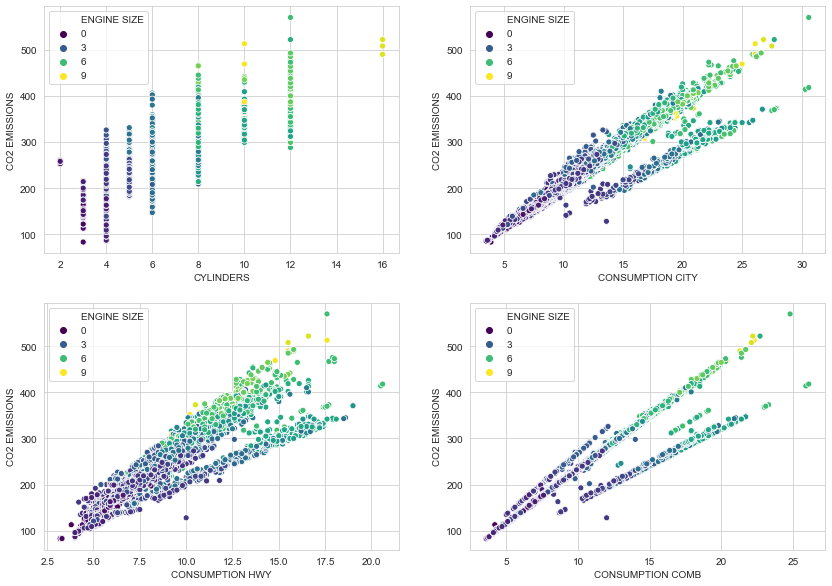

In [53]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(x='CYLINDERS',y='CO2 EMISSIONS',data=df,hue='ENGINE SIZE',palette='viridis',ax=axes[0,0])
sns.scatterplot(x='CONSUMPTION CITY',y='CO2 EMISSIONS',data=df,hue='ENGINE SIZE',palette='viridis',ax=axes[0,1])
sns.scatterplot(x='CONSUMPTION HWY',y='CO2 EMISSIONS',data=df,hue='ENGINE SIZE',palette='viridis',ax=axes[1,0])
sns.scatterplot(x='CONSUMPTION COMB',y='CO2 EMISSIONS',data=df,hue='ENGINE SIZE',palette='viridis',ax=axes[1,1]);

#### All the plots above show us that there is a clear difference in behavior for the emissions of CO<sub>2</sub>.

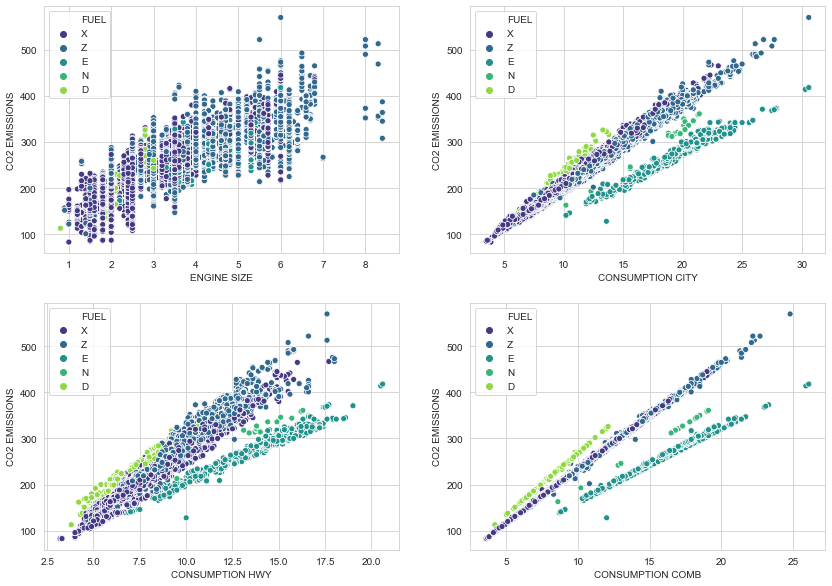

In [54]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(x='ENGINE SIZE',y='CO2 EMISSIONS',data=df,hue='FUEL',palette='viridis',ax=axes[0,0])
sns.scatterplot(x='CONSUMPTION CITY',y='CO2 EMISSIONS',data=df,hue='FUEL',palette='viridis',ax=axes[0,1])
sns.scatterplot(x='CONSUMPTION HWY',y='CO2 EMISSIONS',data=df,hue='FUEL',palette='viridis',ax=axes[1,0])
sns.scatterplot(x='CONSUMPTION COMB',y='CO2 EMISSIONS',data=df,hue='FUEL',palette='viridis',ax=axes[1,1]);

In [63]:
df.loc[df.FUEL == 'X','FUEL'] = 'Regular Gasoline'
df.loc[df.FUEL == 'Z','FUEL'] = 'Premium Gasoline'
df.loc[df.FUEL == 'D','FUEL'] = 'Diesel'
df.loc[df.FUEL == 'N','FUEL'] = 'Natural Gas'
df.loc[df.FUEL == 'E','FUEL'] = 'Ethanol'

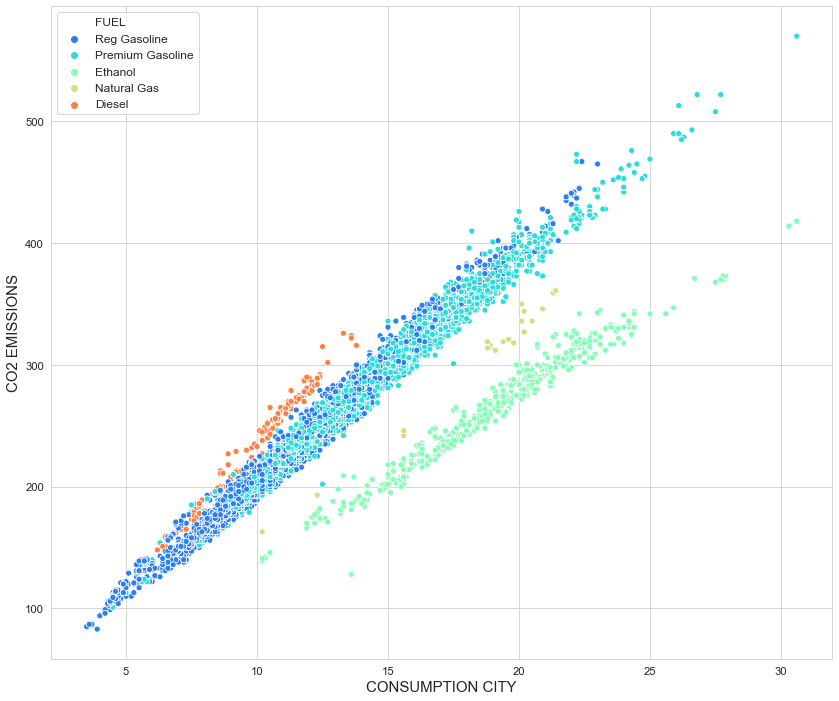

In [67]:
fig, axes = plt.subplots(figsize=(14,12))
sns.scatterplot(x='CONSUMPTION CITY',y='CO2 EMISSIONS',data=df,hue='FUEL',palette='rainbow');

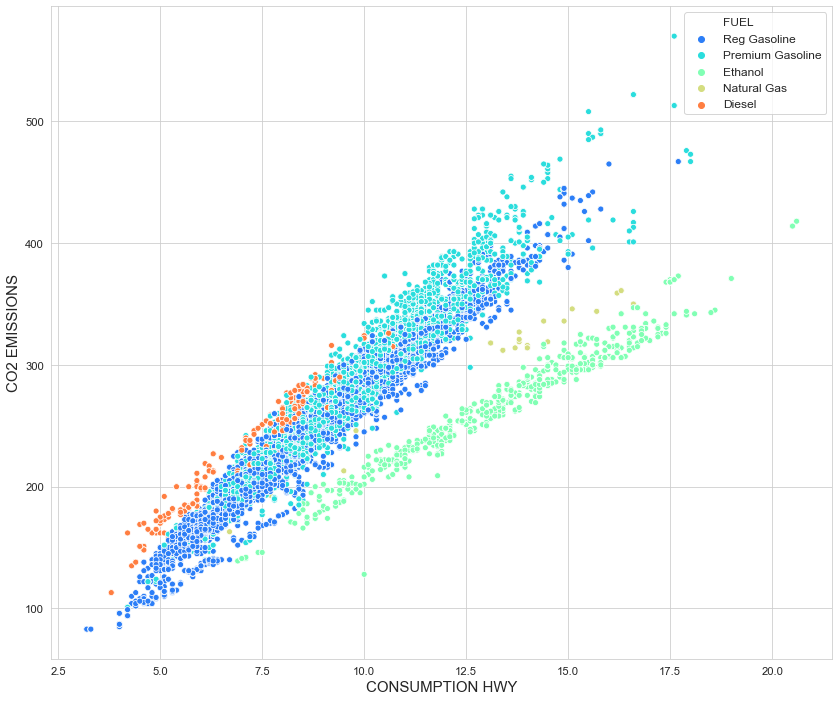

In [68]:
fig, axes = plt.subplots(figsize=(14, 12))
sns.scatterplot(x='CONSUMPTION HWY',y='CO2 EMISSIONS',data=df,hue='FUEL',palette='rainbow');

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 
This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that we know the outcome of each data point in this dataset, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it’s truly an out-of-sample testing.



In [6]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

#### Train data distribution

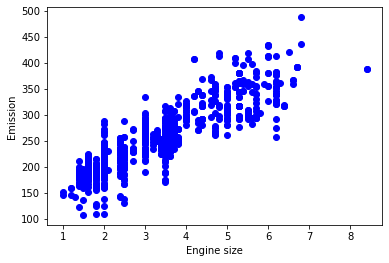

In [7]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that Multiple linear regression is the extension of simple linear regression model.

In [8]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[10.51067839  7.85942705  9.68066582]]


As mentioned before, __Coefficient__ and __Intercept__ , are the parameters of the fit line. 
Given that it is a multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

#### Ordinary Least Squares (OLS)
OLS is a method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those predicted by the linear function. In other words, it tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between the target variable (y) and our predicted output ($\hat{y}$) over all samples in the dataset.

OLS can find the best parameters using of the following methods:
    - Solving the model parameters analytically using closed-form equations
    - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

<h2 id="prediction">Prediction</h2>

In [9]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 622.42
Variance score: 0.84


__explained variance regression score:__  
If $\hat{y}$ is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

$\texttt{explainedVariance}(y, \hat{y}) = 1 - \frac{Var\{ y - \hat{y}\}}{Var\{y\}}$  
The best possible score is 1.0, lower values are worse.

<h2 id="practice">Practice</h2>
Try to use a multiple linear regression with the same dataset but this time use __FUEL CONSUMPTION in CITY__ and 
__FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB. Does it result in better accuracy?

In [10]:
# write your code here
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))



Coefficients:  [[10.59930506  7.62091379  5.86076573  3.63787604]]
Residual sum of squares: 621.47
Variance score: 0.84


Double-click __here__ for the solution.

<!-- Your answer is below:

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)
y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))


-->

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>